In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import verde as vd
import glob
import seaborn as sns
%matplotlib inline

In [22]:
stations = pd.read_csv(r'D:\gravitystations.csv', encoding = "ISO-8859-1")

In [23]:
wyoming  = stations[stations['latitude']>=41]

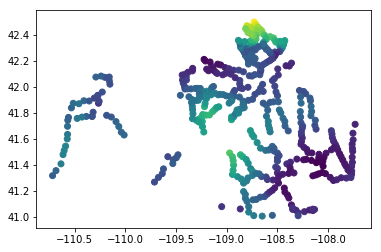

In [24]:
plt.scatter(wyoming.longitude, wyoming.latitude, c=wyoming.complete_bouger)

Text(0.5,1,'gravity')

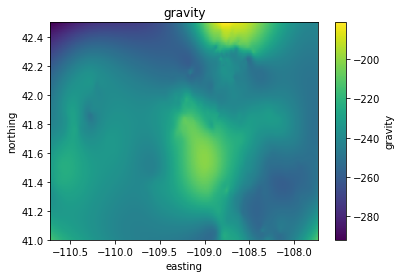

In [25]:
spline = vd.Spline()
spline.fit((wyoming['longitude'], wyoming['latitude']), wyoming['complete_bouger'])
grid = spline.grid(spacing=0.005,data_names=["gravity"])
grid.gravity.plot.pcolormesh(cmap="viridis")
plt.title('gravity')

In [47]:
path = r'C:\\Users\\jesse.pisel\\Downloads\\magnetics\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file)
    listed.append(df)
frame = pd.concat(listed, sort=False)
frame.head()

,line,fid,time,day,year,latitude,longitude,radalt,totmag,resmag,diurnal,geology,resmagCM4,day
0,20.0,602.0,95302.0,221.0,1979.0,43.0291,-108.0107,127.4,56719.3,-272.7,-9999.9,ZNA,0.4,NaN
1,20.0,603.0,95303.0,221.0,1979.0,43.0291,-108.0103,126.5,56721.1,-271.0,-9999.9,ZNA,2.0,NaN
2,20.0,604.0,95304.0,221.0,1979.0,43.0291,-108.0098,128.0,56722.8,-269.3,-9999.9,ZNA,3.8,NaN
3,20.0,605.0,95305.0,221.0,1979.0,43.0291,-108.0088,126.5,56722.1,-270.3,-9999.9,ZNA,2.9,NaN
4,20.0,606.0,95306.0,221.0,1979.0,43.0291,-108.0084,126.8,56721.3,-271.1,-9999.9,ZNA,2.0,NaN


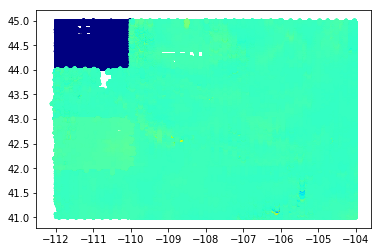

In [56]:
plt.scatter(frame.longitude, frame.latitude, c=frame.resmagCM4, s=10, cmap='jet')
#plt.scatter(frame.longitude, frame.latitude, c=frame.resmag, s=100, cmap='Greens', alpha=0.01)
#plt.scatter(frame.longitude, frame.latitude, c=frame.resmag, s=100, cmap='Blues', alpha=0.01)

In [49]:
frame.totmag.loc[frame.totmag < frame.totmag.quantile(.001)] = frame.totmag.median()
frame.totmag.loc[frame.totmag > frame.totmag.quantile(.999)] = frame.totmag.median()
#frame
#frame.totmag.quantile(0.01)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


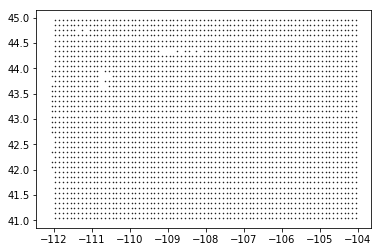

In [50]:
reducer = vd.BlockReduce(reduction=np.median, spacing=0.1, center_coordinates=True)
coordinates, magnetics = reducer.filter(coordinates=(frame.longitude, frame.latitude), data=frame.totmag
                                       )
plt.plot(*coordinates, ".k", markersize=1)

In [51]:
coordinates[0].shape

(3199,)

In [52]:
spline = vd.Spline()
spline.fit((coordinates[0], coordinates[1]), magnetics)


Spline(damping=None, engine='auto',
    force_coords=(array([-111.9582 , -111.85807, ..., -104.1478 , -104.04767]), array([41.04754, 41.04754, ..., 44.95046, 44.95046])),
    mindist=1e-05)

Text(0.5,1,'magnetics')

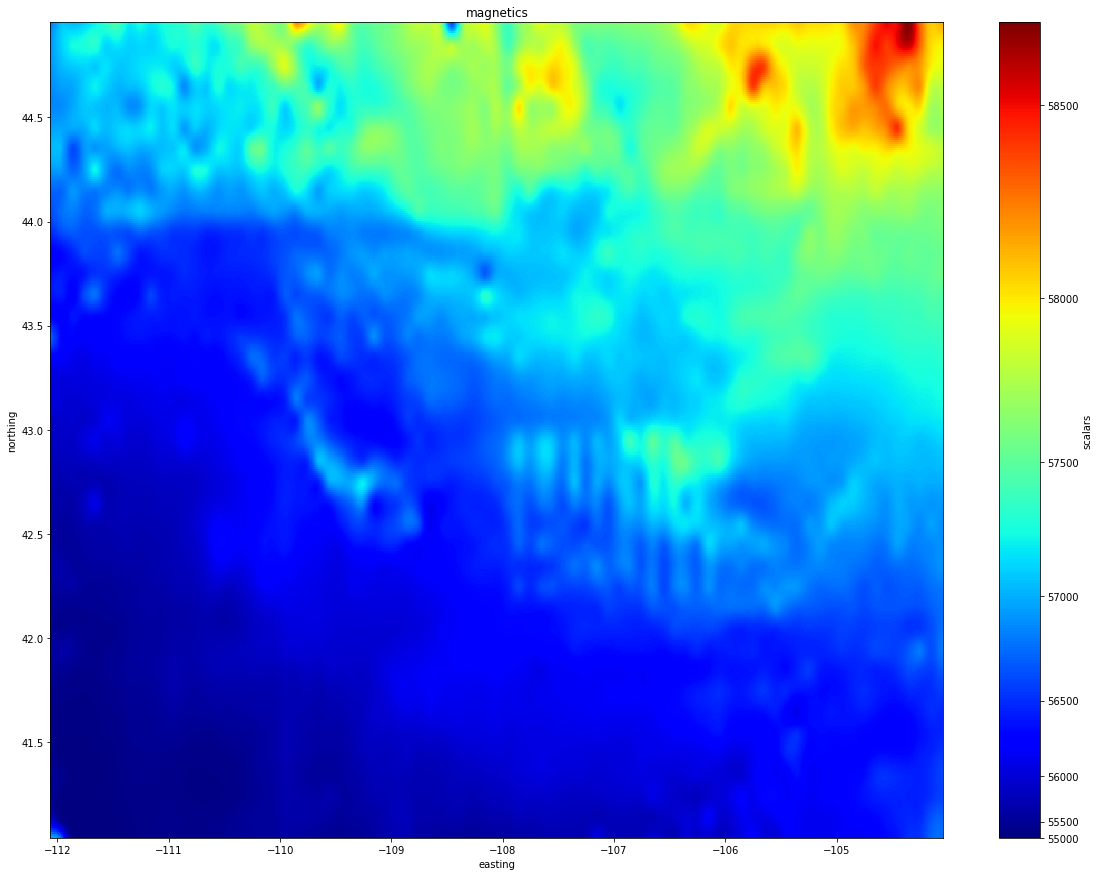

In [54]:
import matplotlib.colors as colors
grid = spline.grid(spacing=0.01)
grid.scalars.plot.pcolormesh(cmap="jet",figsize=(20,15), norm=colors.PowerNorm(gamma=2.))
plt.title('magnetics')